In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt


In [6]:
# optimized function: f(x) = 3x1^2 + 2x2^2+ 4x1x2 − 5x1 + 6x2

#fix random seed
np.random.seed(42)

lr = 0.2    #learning rate
e = 0.5     #error, an error in which we consider that we have found the minimum
max_iterations = 1000   #max iteration to find minimal


def f(x1, x2):
    return 3 * (x1 *x1) + 2 * (x2 * x2) + 4 * x1 * x2 - 5 * x1 + 6 * x2

def grad(x1, x2):

    dfdx1 = 6 * x1 + 4 * x2 - 5
    dfdx2 = 4 * x2 + 4 * x1 + 6

    return dfdx1, dfdx2


x1 = np.random.randint(-100, 100)
x2 = np.random.randint(-100, 100)

pos = (x1, x2) 

history = []

for i in range(max_iterations):
    dx1, dx2 = grad(*pos)   #сalc derivative for each variable at pos

    if sqrt(dx1 * dx1 + dx2 * dx2) > e: #check len of grad vector
        history.append(pos) #update history
        x1 -= lr * dx1  #update variables 
        x2 -= lr * dx2
        pos = (x1, x2)
    else:   #break if grad is enough minimal
        print(f'Minimum found on {i} step, f(x): {f(x1, x2):.2f} x1:{x1:.2f} x2:{x2:.2f}')
        break  

# print(history[:10])
    

Minimum found on 36 step, f(x): -34.74 x1:5.50 x2:-6.92


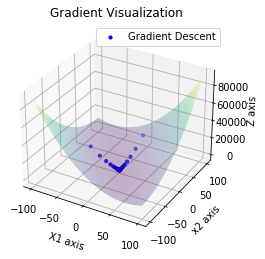

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)

x1_hist = tuple(p[0] for p in history)  #get historical values for each variable
x2_hist = tuple(p[1] for p in history)
z_hist = tuple(f(*pos) for pos in history)


ax.scatter(x1_hist, x2_hist, z_hist, color='b', s=10, label='Gradient Descent')

ax.set_xlabel('X1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('Z axis')
ax.set_title('Gradient Visualization')
ax.legend()

plt.show()